In [112]:
import pandas as pd
import seaborn as sns
# Specify the path to your Excel file
file_path = '../data/radiomiques_global.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,classe_name,temps_inj,patient_num,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,Mixtes,VEIN,9,175.0,324.0,354376998.0,3.013456,74.00,4.780095,504.0,...,20.803398,0.025307,6.664670,0.124815,284.093281,5.160969,0.002559,59.816065,0.023803,0.482011
1,Mixtes,TARD,9,156.0,271.0,277383044.0,2.735473,56.00,4.454940,414.0,...,12.453376,0.029698,6.641130,0.098596,361.311999,7.259237,0.002152,34.917062,0.018849,0.226643
2,Mixtes,PORT,9,174.0,289.0,297110913.0,2.730577,51.00,4.103634,441.0,...,14.353061,0.034081,6.529717,0.111934,286.446393,6.781975,0.002379,36.571451,0.018595,0.249370
3,Mixtes,ART,9,180.7,416.3,553036349.0,3.716371,115.00,3.639202,671.0,...,50.323983,0.019024,6.964388,0.204971,59.313141,1.936159,0.003218,146.176224,0.031472,0.950978
4,Mixtes,VEIN,8,130.0,148.1,1189941.0,0.620400,8.25,4.121147,159.0,...,2.629845,0.279624,2.250000,0.133333,62.750000,0.417342,0.345594,0.448039,0.006297,0.473381


In [113]:
df_global = pd.read_excel('../data/radiomiques_global.xlsx')
df_descriptif = pd.read_excel('../data/Descriptif_patients.xlsx')

/Users/vincentlesang/miniconda3/envs/pythonenv/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell M28 is marked as a date but the serial value 6684731 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


<Axes: xlabel='Age_at_disease', ylabel='Count'>

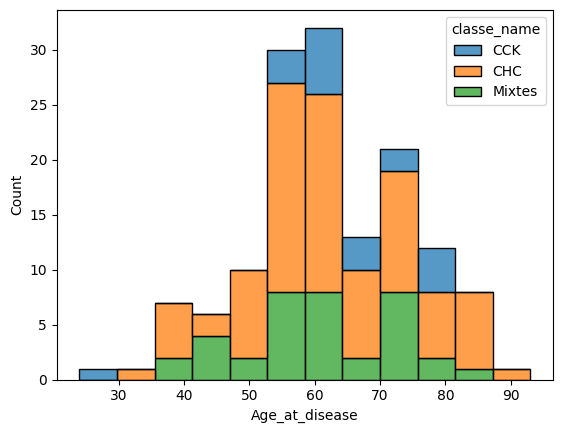

In [114]:
sns.histplot(data=df_descriptif, x="Age_at_disease", hue='classe_name', multiple="stack")

In [115]:
df_descriptif['Date_of_surgery'] = pd.to_datetime(df_descriptif['Date_of_surgery'])
df_descriptif['Date_of_distant_relapse'] = pd.to_datetime(df_descriptif['Date_of_distant_relapse'])
df_descriptif['Date_of_local_relapse'] = pd.to_datetime(df_descriptif['Date_of_local_relapse'])
df_descriptif['Date_of_death'] = pd.to_datetime(df_descriptif['Date_of_death'])
df_descriptif['Date_of_lost_of_FU'] = pd.to_datetime(df_descriptif['Date_of_lost_of_FU'])


In [116]:
df_descriptif['Local_relapse'] = df_descriptif['Date_of_local_relapse'].fillna(0)
df_descriptif['Distant_relapse'] = df_descriptif['Date_of_distant_relapse'].fillna(0)
df_descriptif['Death'] = df_descriptif['Date_of_death'].fillna(0)

In [117]:
df_descriptif['survival_time'] = (df_descriptif['Date_of_death'] - df_descriptif['Date_of_MRI']).dt.days
df_descriptif['local_relapse_time'] = (df_descriptif['Date_of_local_relapse'] - df_descriptif['Date_of_MRI']).dt.days
df_descriptif['distant_relapse_time'] = (df_descriptif['Date_of_distant_relapse'] - df_descriptif['Date_of_MRI']).dt.days
df_descriptif['censorship_time'] = (df_descriptif['Date_of_lost_of_FU'] - df_descriptif['Date_of_MRI']).dt.days


In [118]:
df_descriptif.describe()

,patient_num,Age_at_disease,Date_of_MRI,Date_of_surgery,Alpha_foetoprotein,Date_of_local_relapse,Date_of_distant_relapse,Date_of_death,Date_of_lost_of_FU,survival_time,local_relapse_time,distant_relapse_time,censorship_time
count,147.000000,142.000000,145,132,113.000000,48,36,52,39,52.000000,48.000000,36.000000,39.000000
mean,61.224490,62.226934,2015-05-29 12:44:41.379310336,2013-06-10 18:43:38.181818112,3535.713274,2017-08-22 12:30:00,2017-06-09 03:20:00,2018-04-14 00:55:23.076923136,2022-06-27 12:18:27.692307712,1076.942308,617.812500,570.222222,2121.564103
min,1.000000,24.000000,2008-11-24 00:00:00,1905-07-02 00:00:00,0.000000,2012-04-01 00:00:00,2012-04-01 00:00:00,2013-05-02 00:00:00,2016-04-08 00:00:00,32.000000,43.000000,43.000000,86.000000
25%,15.500000,55.236301,2012-12-26 00:00:00,2013-10-23 06:00:00,2.000000,2015-12-03 18:00:00,2015-07-09 00:00:00,2015-08-21 18:00:00,2021-10-17 00:00:00,329.000000,195.250000,187.500000,1570.500000
50%,33.000000,61.432877,2015-05-12 00:00:00,2015-08-09 12:00:00,6.100000,2017-11-19 12:00:00,2017-07-15 12:00:00,2018-07-06 00:00:00,2023-10-18 00:00:00,801.000000,394.000000,303.500000,2142.000000
75%,84.500000,71.182877,2017-09-20 00:00:00,2017-12-25 06:00:00,66.000000,2019-08-02 00:00:00,2019-10-10 18:00:00,2020-08-02 00:00:00,2023-11-28 00:00:00,1779.250000,944.500000,685.750000,2614.500000
max,222.000000,93.000000,2021-01-14 00:00:00,2021-02-01 00:00:00,176000.000000,2022-11-25 00:00:00,2021-08-30 00:00:00,2023-05-13 00:00:00,2023-12-08 00:00:00,3364.000000,2572.000000,2531.000000,4743.000000
std,64.906761,12.187302,NaN,NaN,18766.775911,NaN,NaN,NaN,NaN,913.140507,577.968771,641.576055,1106.694837


In [119]:
descriptif_survival = df_descriptif.drop(columns = ['Date_of_surgery', 'Date_of_MRI', 'Date_of_distant_relapse', 'Date_of_local_relapse', 'Date_of_death', 'Alpha_foetoprotein'], inplace = False)

In [120]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures, LabelEncoder

# Label encoding
gender_encoder = LabelEncoder()
classe_encoder = LabelEncoder()

gender_encoder.fit(descriptif_survival["Gender"])
classe_encoder.fit(descriptif_survival["classe_name"])

descriptif_survival['Gender'] = gender_encoder.transform(descriptif_survival['Gender'])
descriptif_survival['classe_name'] = classe_encoder.transform(descriptif_survival['classe_name'])



In [121]:
descriptif_survival.head()

,classe_name,patient_num,Gender,Age_at_disease,Local_relapse,Distant_relapse,Death,Date_of_lost_of_FU,survival_time,local_relapse_time,distant_relapse_time,censorship_time
0,0,10,1,62.0,0,0,2015-11-11 00:00:00,NaT,134.0,NaN,NaN,NaN
1,0,11,0,57.0,0,0,0,2017-06-08,NaN,NaN,NaN,748.0
2,0,12,1,58.0,0,2016-06-16 00:00:00,2021-03-30 00:00:00,NaT,1870.0,NaN,122.0,NaN
3,0,13,1,65.0,0,2017-06-19 00:00:00,2022-04-25 00:00:00,NaT,2148.0,NaN,377.0,NaN
4,0,14,1,64.0,0,0,2017-03-27 00:00:00,NaT,152.0,NaN,NaN,NaN


In [111]:
descriptif_survival.isnull().sum()


classe_name               0
patient_num               0
Gender                    0
Age_at_disease            5
Local_relapse             0
Distant_relapse           0
Death                     0
Date_of_lost_of_FU      108
survival_time            95
local_relapse_time      100
distant_relapse_time    111
dtype: int64